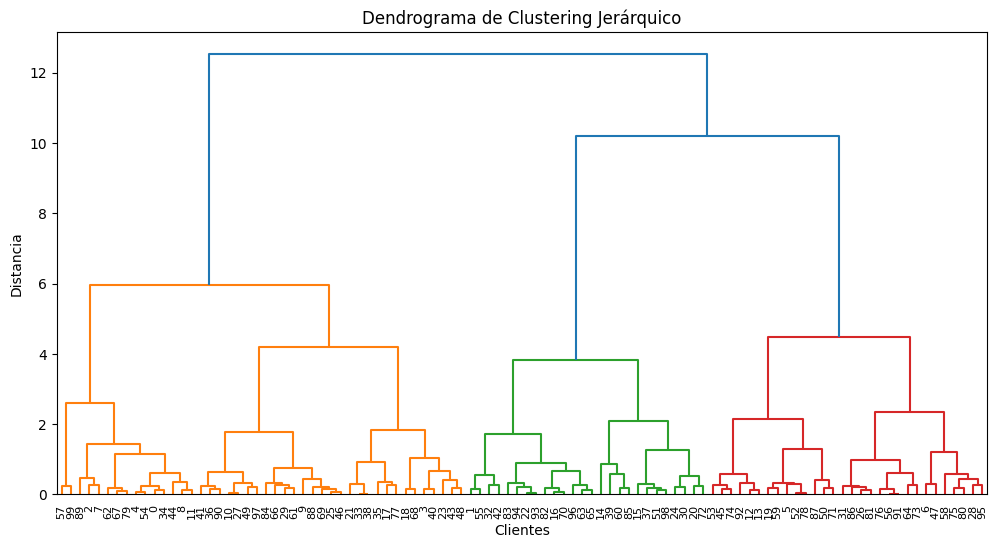

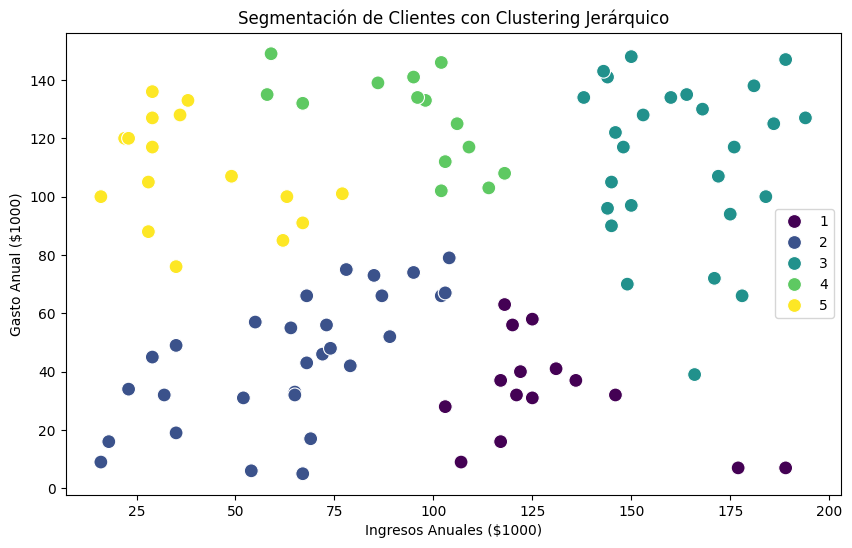

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# 📌 Generación de datos de 100 clientes con ingresos y gasto anual
np.random.seed(42)  # Para reproducibilidad de resultados

# Ingresos en miles de dólares (entre 15K y 200K)
ingresos = np.random.randint(15, 200, 100)
# Gasto anual en miles de dólares (entre 5K y 150K)
gasto = np.random.randint(5, 150, 100)

# Crear DataFrame con los datos
df = pd.DataFrame({'Ingresos_Anuales': ingresos, 'Gasto_Anual': gasto})

# 📌 Normalización de los datos para que todas las variables tengan la misma escala
scaler = StandardScaler()  # Inicializar el normalizador
df_scaled = scaler.fit_transform(df)  # Aplicar normalización

# 📌 Aplicar Clustering Jerárquico
linkage_matrix = linkage(df_scaled, method='ward')  # Generar matriz de enlaces usando el método Ward

# 📌 Visualización del Dendrograma
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()

# 📌 Definir el número de clusters y asignar etiquetas
num_clusters = 5  # Se pueden ajustar según el dendrograma
df['Cluster'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 📌 Visualización de Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Ingresos_Anuales'], y=df['Gasto_Anual'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel("Ingresos Anuales ($1000)")
plt.ylabel("Gasto Anual ($1000)")
plt.title("Segmentación de Clientes con Clustering Jerárquico")
plt.legend()
plt.show()
